# What this does

Have you collected data from the Virtual Silcton platform before 2021? If so, the data you collected from the pointing task likely contained a bug. For more information, see this repo: https://github.com/smweis/Virtual_Silcton_Analysis

By running this script on your data, you will be able to download output that uses a simple linear regression model that predicts **actual pointing error** using the **buggy pointing error** separately for within-route and between-route trials. This data is predicted at the **participant-average** level, not the trial level. (You will receive output consisting of two datapoints per participant - their corrected within-pointing error and their corrected between-pointing error). 

# How to load in your data

This notebook will compute corrections on the participant-average level data. For the trial level notebook, use the Correction_Machine_Silcton.ipynb notebook found in the Git repo linked above). 

1. Upload your CSV to Google Drive. 
2. Find the CSV on Google Drive.
3. Right-click the file and select **'Share'**. 
4. Change **'Restricted'** to **'Anyone with Link'**
5. Copy the link to the file and paste below as `PATH_TO_YOUR_DATA`
6. Change the values for `within_pointing_name` and `between_pointing_name` to match what you name them on your CSV. 
7. Run the cell (by clicking the Cell menu, then **Run all**
8. (Optional) scroll down to view the output (whether any data were removed or missing) and the visualizations. 

Note: `Training_Data.csv`is the data collected by Weisberg, Newcombe, & Schinazi to address the Silcton bug. It is contained in the files with this notebook, so there is no need to modify it. 

# How to download your corrected data

1. At the top of this page, click 'File -> Open'
2. You should see your CSV. Click the checkbox, then select 'Download'. 

## DON'T FORGET TO CHANGE THE FIRST LINE OF CODE BELOW TO THE PATH TO YOUR DATA FROM GOOGLE DRIVE

In [6]:
# CHANGE THIS TO THE PATH TO YOUR DATA FROM GOOGLE DRIVE
PATH_TO_YOUR_DATA="https://drive.google.com/file/d/154l9LjmaETsCj5nnBM5qE-oFTJ6lDz9-/view?usp=sharing"

# CHANGE THIS TO THE NAMES OF YOUR WITHIN AND BETWEEN POINTING VARIABLES
within_pointing_name = 'within'
between_pointing_name = 'between'

# OPTIONAL: Change this output file name for more than one dataset. 
output_file_name = 'Silcton_Pointing_Corrected.csv'

from io import StringIO
import requests

import pandas as pd
import numpy as np
from sklearn import linear_model

# Training_Data.csv is the data used to train the model.
# These data were coded to have both buggy data AND corrected data, and are used to train the regression model. 
# The data are stored in the repo with this notebook, so you do not need to change this. 
df_train_path = 'Training_Data.csv'
df_train = pd.read_csv(df_train_path, encoding = 'unicode_escape', sep = ",")

# We train only on new data
df_train = df_train[df_train.New_or_Original=='New']

# Separate models for within and between 
X_train_within = df_train[['bad_pointing_coding_within']]
y_train_within = df_train[['good_pointing_coding_within']]



within_model = linear_model.LinearRegression()
within_model.fit(X_train_within,y_train_within)

X_train_between = df_train[['bad_pointing_coding_between']]
y_train_between = df_train[['good_pointing_coding_between']]

between_model = linear_model.LinearRegression()
between_model.fit(X_train_between,y_train_between)


# Upload the participant data from Google Drive
if PATH_TO_YOUR_DATA=="https://drive.google.com/file/d/154l9LjmaETsCj5nnBM5qE-oFTJ6lDz9-/view?usp=sharing":
    print('THE DATA USED WAS THE TEST DATA. PLEASE BE SURE YOUR DATA CORRECTLY ENTERED\n')
    
file_id = PATH_TO_YOUR_DATA.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)

# drop nan values
df.dropna(inplace=True)

# we store in an array all predicted (corrected) angles
df.loc[:,'within_corrected'] = within_model.predict(df[[within_pointing_name]])
df.loc[:,'between_corrected'] = between_model.predict(df[[between_pointing_name]])


# we save the array of corrected predictions 
df.to_csv(output_file_name)


print(f'Data saved as {output_file_name}')



THE DATA USED WAS THE TEST DATA. PLEASE BE SURE YOUR DATA CORRECTLY ENTERED

Data saved as Silcton_Pointing_Corrected.csv


# Information about the model fits

Model fit is exceptionally high (both r-values > .93). Including polynomials does not improve the fit. 

From what we have observed so far, a simple scalar transformation on both participant-level trial sets (within-route and between-route trials) has the maximal return. 

In [7]:
print(f'Within-route model coefficient = {within_model.coef_[0][0]:.3}, fit, r = {within_model.score(X_train_within,y_train_within):.3}')
print(f'Between-route model coefficient = {between_model.coef_[0][0]:.3}, fit, r = {between_model.score(X_train_between,y_train_between):.3}')



Within-route model coefficient = 1.45, fit, r = 0.932
Between-route model coefficient = 1.28, fit, r = 0.935


## Visualization of corrections

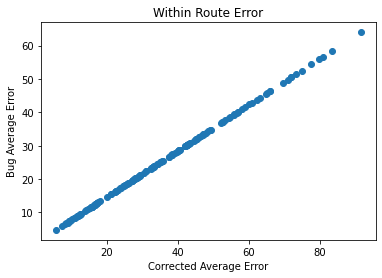

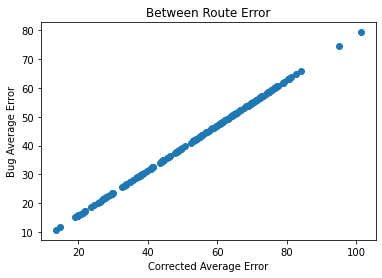

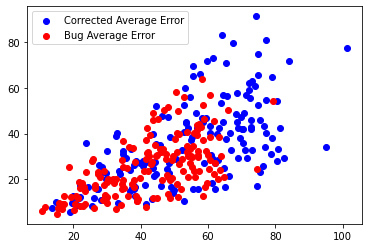

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


fig, ax = plt.subplots()
ax.scatter(df['within_corrected'],
           df[within_pointing_name])
ax.set_title('Within Route Error')
ax.set_xlabel('Corrected Average Error')
ax.set_ylabel('Bug Average Error')

fig, ax = plt.subplots()
ax.scatter(df['between_corrected'],
           df[between_pointing_name])
ax.set_title('Between Route Error')
ax.set_xlabel('Corrected Average Error')
ax.set_ylabel('Bug Average Error')

fig, ax = plt.subplots()
ax.scatter(df['between_corrected'],
           df['within_corrected'], 
           c='blue',label='Corrected Average Error')
ax.scatter(df[between_pointing_name],
           df[within_pointing_name], 
           c='red',label='Bug Average Error')

plt.legend()

plt.show()